### Для просмотра файа формата netCDF я выбрал библиотеку netCDF4. Подключаем библиотеку и некоторые её функции

In [1]:
import netCDF4 as nc4
from netCDF4 import Dataset,num2date
import numpy as np

### Прочитаем наш свеженький скаченный файл

In [2]:
my_example_nc_file = (r'D:\science things\Izhora_Plateu\ERA\interim_STEP_12.nc') # у вас он сохранится в каком-то другом месте
fh = nc4.Dataset(my_example_nc_file, mode='r')

### Посмотрим переменные, которые у нас имеются

In [3]:
fh.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 >f4 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (41,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 >f4 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (25,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 >i4 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: time
 current shape = (2,)
 filling on, default _FillValue of -2147483647 used,
 't2m': <class 'netCDF4._netCDF4.Variable'>
 >i2 t2m(time, latitude, longitude)
     scale_factor: 0.0002825240479987182
     add_offset: 246.7259787330932
     _FillValue: -32767
     missing_value: -32767
     units: K
     long_name: 2 metre temperature
 unlimited dimen

### Так как время считается от 01/01/1900 00:00:00, то для понимания лучше его привести к адекватным значениям. Сделать это можно с помощью следующей манипуляции

In [4]:
t = fh.variables['time']
dtime = nc4.num2date(t[:], t.units)

### Лучший способ понять, что мы получили, это нарисовать. Для этого нам нужно X, Y и Z. Широты, Долготы и непосредственно сама величина

In [8]:
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
sp = fh.variables['t2m'][:] # изучив вызов .variables замените название столбца на соответствующее сокращение


### Для проверки размерности используется метод .units

In [10]:
sp_units = fh.variables['t2m'].units

In [11]:
sp_units

'K'

### Чтобы в оперативной памяти наш датасет, после присвоения всех величин, не болтался в пустую, его стоит закрыть

In [12]:
fh.close()

### Для рисования воспользуемся библиотекой basemap

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

### Код ниже, в принципе, понятен. Взят он из примера в интернете. Комментарии вполне ясны. В случае чего вы знаете куда писать

In [14]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()


m = Basemap(width=600000,height=600000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [15]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

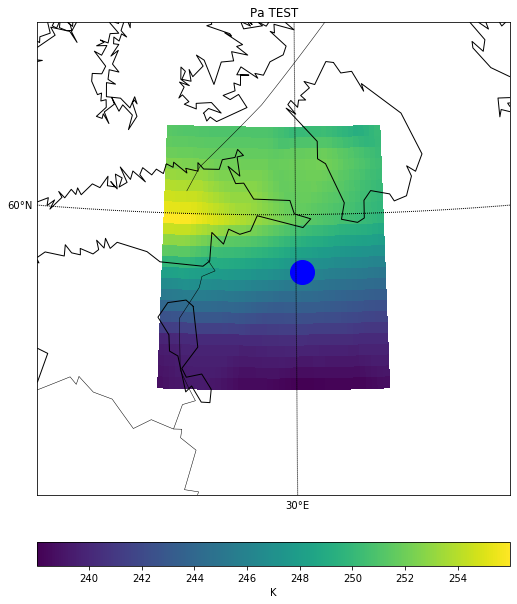

In [16]:
plt.figure(figsize=(18,10))
# Plot Data
cs = m.pcolor(xi,yi, sp[0])

# отрисуйте какую-нибудь станцию, задав её координаты вручную"
lon = 30.129958
lat = 59.347355
x,y = m(lon, lat)
m.plot(x, y, 'bo', markersize=24)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sp_units)

# Add Title
plt.title('Pa TEST')


plt.show()

In [19]:
sp.shape

(1464, 241, 249)

488

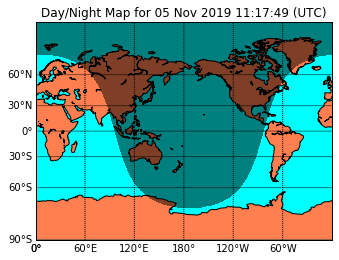

In [32]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()